In [95]:
import numpy as np  
import matplotlib.pyplot as plt

## Constants and given values

In [96]:
ndark=0.002      #number of electrons/sec/pixel
NRON=1.5         #Read out noise e/pixel 

Cr=-16.26
skyBr_r=5.47*10**(-16)

Ci=-16.06
skyBr_i=2.15*10**(-16)

Cg=-16.26
skyBr_g=8.11*10**(-16)

In [97]:
angle_to_pixel=0.55

In [98]:
r=2                 #PSF radius in arcsec 
A=np.pi*r**2
Npix=A/angle_to_pixel**2          #Number of pixel from the PSF and dimension in arcsec of the pixel length 
Npix

41.54172103920387

In [99]:
c=3*10**(18)
li=8000
lr=6500
lg=4500

Final Formula

In [100]:
def SNR(time, C, mnu, skyBr,l):
    nsky=skyBr/10**C*0.55**2            #0.55**2 because is the number of electrons per pixel
    nstar=10**(-((mnu+48.6)/2.5+C))*c/l**2
    return nstar*time/np.sqrt(nstar*time+Npix*(nsky*time+ndark*time+NRON**2))

In [101]:
mnu=18

Text(0, 0.5, 'SNR')

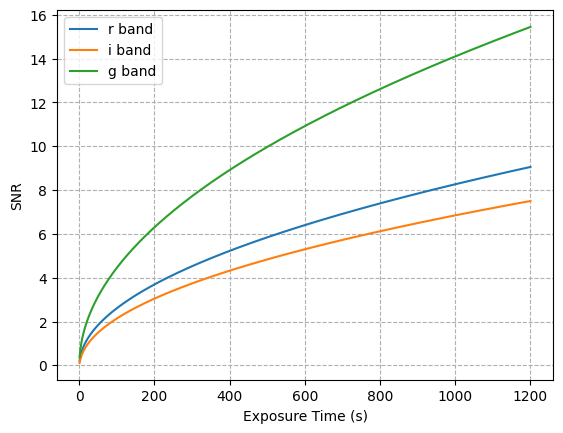

In [107]:
t_values = np.linspace(1, 1200, 500)
snr_values_r = SNR(t_values, Cr,mnu, skyBr_r,lr)
snr_values_i = SNR(t_values, Ci,mnu, skyBr_i,li)
snr_values_g = SNR(t_values, Cg,mnu, skyBr_g,lg)
plt.plot(t_values, snr_values_r, label='r band')
plt.plot(t_values, snr_values_i, label='i band')
plt.plot(t_values, snr_values_g, label='g band')
# plt.plot(t_values, SNR(t_values, Cr, 17, skyBr_r,lr), color='red', linestyle='--')
# plt.plot(t_values, SNR(t_values, Ci, 17, skyBr_i,li), color='black', linestyle='--')
# plt.plot(t_values, SNR(t_values, Cg, 17, skyBr_g,lg), color='green', linestyle='--')
plt.xlabel('Exposure Time (s)')
plt.grid(visible=None, which='major', axis='both',linestyle='--')
plt.legend()
plt.ylabel('SNR')